In [2]:
import numpy as np


In [2]:
class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    distinct_rows = N

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R


In [3]:
N = 2000
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 1.5, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times)


7.4712205844756285
9.192315602367067
15.70337052729098
32.01340854616019
60.437000769771075
36.77085045951293
24.83105755796652
21.054527586687687
17.11026049013063
14.557558810063451
13.152276698430876
11.89752022597035
10.86002559382244
10.26882510128635
9.814546990344441
9.110253431418759
8.465976569304706
7.751664951462301
7.249254163111291
7.138174861833962
7.0753450899694865
6.439000966746482
6.222419690139447
6.645733034974199
5.981139553925869
5.674436986432046
5.854069239849724
5.389677950981353
5.095664587395354
5.609538849076723
[7.4712205844756285, 9.192315602367067, 15.70337052729098, 32.01340854616019, 60.437000769771075, 36.77085045951293, 24.83105755796652, 21.054527586687687, 17.11026049013063, 14.557558810063451, 13.152276698430876, 11.89752022597035, 10.86002559382244, 10.26882510128635, 9.814546990344441, 9.110253431418759, 8.465976569304706, 7.751664951462301, 7.249254163111291, 7.138174861833962, 7.0753450899694865, 6.439000966746482, 6.222419690139447, 6.64573303

In [4]:
N = 20000
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 1.5, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times2 = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times2.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times2)


9.236380549082785
13.165248195031705
22.21765886181771
63.505385948696855
93.18643185027918
51.16610537724851
35.132252849593115
28.076787228552377
22.71591998554473
20.03119285983929
18.07853107569256
16.109621796495595
14.771857146407893
14.096911720053706
13.077705672132804
13.314585315147571
11.968966417233895
11.690895322154677
10.500375710548443
9.774216713158918
9.244672419527918
9.10228449433905
8.730847498980932
8.77077181775907
8.539412490930655
8.308420994387571
8.019965890451491
7.743825860194621
7.561537332004588
7.182956404495323
[9.236380549082785, 13.165248195031705, 22.21765886181771, 63.505385948696855, 93.18643185027918, 51.16610537724851, 35.132252849593115, 28.076787228552377, 22.71591998554473, 20.03119285983929, 18.07853107569256, 16.109621796495595, 14.771857146407893, 14.096911720053706, 13.077705672132804, 13.314585315147571, 11.968966417233895, 11.690895322154677, 10.500375710548443, 9.774216713158918, 9.244672419527918, 9.10228449433905, 8.730847498980932, 8

In [7]:
N = 200
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 1.5, 30)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times2 = []

for i in range(len(b)):
    t_p_mixing = 0
    for j in range(10):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        t_p_mixing += times[p_mix_index]
    p_mixing_times2.append(t_p_mixing/10)
    print(t_p_mixing/10)

print(p_mixing_times2)


5.073835957504668
5.795485416234053
9.23824558716471
13.093146690239749
27.02443387099433
20.754768659199648
15.861089485287843
13.59289386005048
11.10912192061707
9.678759091205418
8.674783687072319
8.276001443786692
7.3769771358850935
6.196245593709476
5.714847510745441
5.812585484314842
5.334852080331681
4.634540832949042
5.081821512293116
4.613638904558037
4.746253499958908
4.021124599064658
4.035713307145594
3.8631402074466026
3.5849301472339947
3.6315415335699206
3.3632126664779998
3.4263812380000873
3.0009933153928086
3.2536219162539957
[5.073835957504668, 5.795485416234053, 9.23824558716471, 13.093146690239749, 27.02443387099433, 20.754768659199648, 15.861089485287843, 13.59289386005048, 11.10912192061707, 9.678759091205418, 8.674783687072319, 8.276001443786692, 7.3769771358850935, 6.196245593709476, 5.714847510745441, 5.812585484314842, 5.334852080331681, 4.634540832949042, 5.081821512293116, 4.613638904558037, 4.746253499958908, 4.021124599064658, 4.035713307145594, 3.8631402

In [5]:
p_mixing200 = [5.073835957504668, 5.795485416234053, 9.23824558716471, 13.093146690239749, 27.02443387099433, 20.754768659199648, 15.861089485287843, 13.59289386005048, 11.10912192061707, 9.678759091205418, 8.674783687072319, 8.276001443786692, 7.3769771358850935, 6.196245593709476, 5.714847510745441, 5.812585484314842, 5.334852080331681, 4.634540832949042, 5.081821512293116, 4.613638904558037, 4.746253499958908, 4.021124599064658, 4.035713307145594, 3.8631402074466026, 3.5849301472339947, 3.6315415335699206, 3.3632126664779998, 3.4263812380000873, 3.0009933153928086, 3.2536219162539957]
p_mixing2000 = [7.4712205844756285, 9.192315602367067, 15.70337052729098, 32.01340854616019, 60.437000769771075, 36.77085045951293, 24.83105755796652, 21.054527586687687, 17.11026049013063, 14.557558810063451, 13.152276698430876, 11.89752022597035, 10.86002559382244, 10.26882510128635, 9.814546990344441, 9.110253431418759, 8.465976569304706, 7.751664951462301, 7.249254163111291, 7.138174861833962, 7.0753450899694865, 6.439000966746482, 6.222419690139447, 6.645733034974199, 5.981139553925869, 5.674436986432046, 5.854069239849724, 5.389677950981353, 5.095664587395354, 5.609538849076723]
p_mixing20000 = [9.236380549082785, 13.165248195031705, 22.21765886181771, 63.505385948696855, 93.18643185027918, 51.16610537724851, 35.132252849593115, 28.076787228552377, 22.71591998554473, 20.03119285983929, 18.07853107569256, 16.109621796495595, 14.771857146407893, 14.096911720053706, 13.077705672132804, 13.314585315147571, 11.968966417233895, 11.690895322154677, 10.500375710548443, 9.774216713158918, 9.244672419527918, 9.10228449433905, 8.730847498980932, 8.77077181775907, 8.539412490930655, 8.308420994387571, 8.019965890451491, 7.743825860194621, 7.561537332004588, 7.182956404495323]
b = np.linspace(0.00002, 1.5, 30)


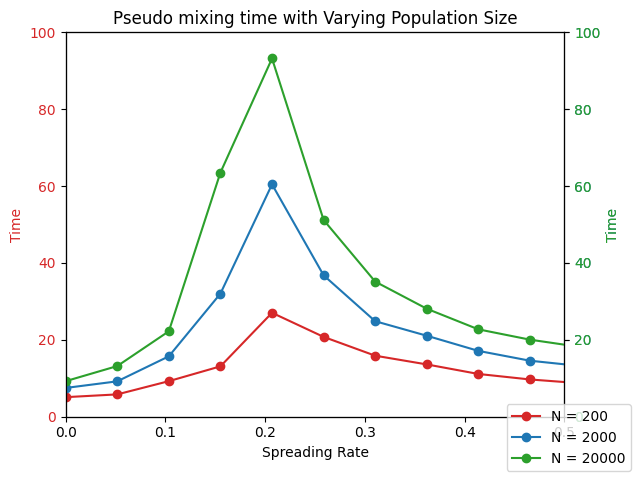

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b, p_mixing200, color=color, marker = 'o', label= 'N = 200')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 0.5)
ax1.set_ylim(0, 100)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax3 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Time', color=color)  # we already handled the x-label with ax1
ax2.plot(b, p_mixing2000, color=color, marker = 'o', label = 'N = 2000')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 100)

color = 'tab:green'
ax3.set_ylabel('Time', color=color)  # we already handled the x-label with ax1
ax3.plot(b, p_mixing20000, color=color, marker = 'o', label = 'N = 20000')
ax3.tick_params(axis='y', labelcolor=color)
ax3.set_ylim(0, 100)

fig.legend(loc = 'lower right')
plt.title('Pseudo mixing time with Varying Population Size')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [7]:
x_data = np.linspace(0.00002, 1.5, 30)
print(x_data)

y_data = [7.4712205844756285, 9.192315602367067, 15.70337052729098, 32.01340854616019, 60.437000769771075]


[2.00000000e-05 5.17434483e-02 1.03466897e-01 1.55190345e-01
 2.06913793e-01 2.58637241e-01 3.10360690e-01 3.62084138e-01
 4.13807586e-01 4.65531034e-01 5.17254483e-01 5.68977931e-01
 6.20701379e-01 6.72424828e-01 7.24148276e-01 7.75871724e-01
 8.27595172e-01 8.79318621e-01 9.31042069e-01 9.82765517e-01
 1.03448897e+00 1.08621241e+00 1.13793586e+00 1.18965931e+00
 1.24138276e+00 1.29310621e+00 1.34482966e+00 1.39655310e+00
 1.44827655e+00 1.50000000e+00]


1.932644058307072
0.3252700908487691
[ 8.60192462 12.02167135 18.02590153 30.11342997 60.68435332]


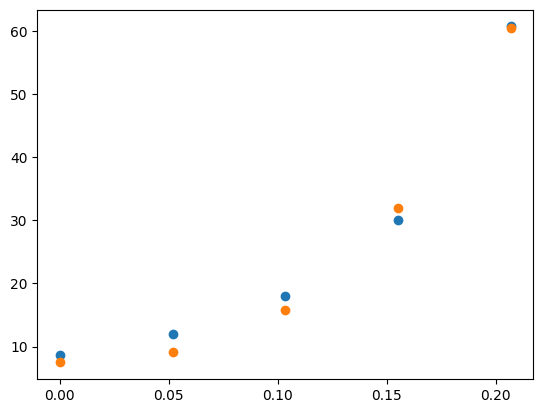

In [8]:
from scipy.optimize import curve_fit
N = 2000
x_data = [2.00000000e-05, 5.17434483e-02, 1.03466897e-01, 1.55190345e-01, 2.06913793e-01]
y_data = [7.4712205844756285, 9.192315602367067, 15.70337052729098, 32.01340854616019, 60.437000769771075]


# Define the Model
def func(x, a, b):
    y_res = (np.log(N) + 1) / (1-(x/b))**a
    return y_res

params, cov = curve_fit(func, x_data, y_data)
  
fitA = params[0]
fitB = params[1]

print(fitA)
print(fitB)
fity = func(x_data, fitA, fitB)
print(fity)

import matplotlib.pyplot as plt
plt.plot(x_data, fity, 'o', label ='data')
plt.plot(x_data, y_data, 'o', label ='data')
plt.show()


c:\Users\sharm\anaconda3\envs\iibproject\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


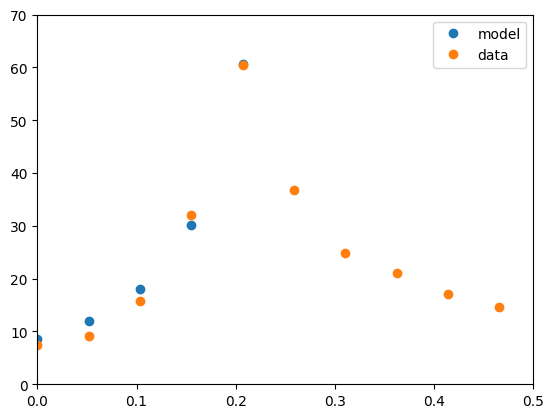

In [10]:
# Define the Model

a = 1.932644058307072
b = 0.3252700908487691
def func(x, a, b):
    y_res = (np.log(N) + 1) / (1-(x/b))**a
    return y_res

y_model = []
x_data = np.linspace(0.00002, 1.5, 30)
y_data = [7.4712205844756285, 9.192315602367067, 15.70337052729098, 32.01340854616019, 60.437000769771075, 36.77085045951293, 24.83105755796652, 21.054527586687687, 17.11026049013063, 14.557558810063451, 13.152276698430876, 11.89752022597035, 10.86002559382244, 10.26882510128635, 9.814546990344441, 9.110253431418759, 8.465976569304706, 7.751664951462301, 7.249254163111291, 7.138174861833962, 7.0753450899694865, 6.439000966746482, 6.222419690139447, 6.645733034974199, 5.981139553925869, 5.674436986432046, 5.854069239849724, 5.389677950981353, 5.095664587395354, 5.609538849076723]
for x in x_data:
    y_model.append(func(x, a, b))

import matplotlib.pyplot as plt
plt.plot(x_data, y_model, 'o', label ='model')
plt.plot(x_data, y_data, 'o', label ='data')
plt.ylim(0, 70)
plt.xlim(0, 0.5)
plt.legend()
plt.show()


In [35]:
print(y_model)


[8.601924624340548, 12.021671352807704, 18.02590146089079, 30.11342990868672, 60.68435341843304, 184.19472658641251, 3326.111698017888, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
